In [2]:
import pandas as pd
from scipy.ndimage.filters import gaussian_filter
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from scipy.misc.pilutil import imread
import numpy as np
import matplotlib.pyplot as plt

In [3]:
filePath = '/Users/yliugd/Downloads/5011/pubg-match-deaths/'
scale = 4096 / 800000

In [4]:
death_0 = pd.read_csv(filePath+'deaths/kill_match_stats_final_0.csv')
death_1 = pd.read_csv(filePath+'deaths/kill_match_stats_final_1.csv')
death_2 = pd.read_csv(filePath+'deaths/kill_match_stats_final_2.csv')
death_3 = pd.read_csv(filePath+'deaths/kill_match_stats_final_3.csv')
death_4 = pd.read_csv(filePath+'deaths/kill_match_stats_final_4.csv')


In [5]:
death = [death_0, death_1, death_2, death_3, death_4]
death = pd.concat (death)

In [6]:
bg = imread(filePath+'erangel.jpg')

/Users/yliugd/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


# 1. MAP
## 1. 1 start

In [49]:
def heatmap(x, y, s, bins=100):
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins)
    heatmap = gaussian_filter(heatmap, sigma=s)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    return heatmap.T, extent

In [50]:
erangel = death.loc[death.map == 'ERANGEL']

In [37]:
erangel = erangel[['time', 'killer_placement', 'victim_position_x', 'victim_position_y']].dropna()
erangel

time  killer_placement  victim_position_x  victim_position_y
179       1035               9.0           497385.4           331528.2
180       1035               9.0           497819.4           331981.3
181       1422               7.0           459817.9           414426.3
182       1210              20.0           487444.2           347651.0
183       1818               2.0           493043.4           434458.1
184       1766               3.0           495755.7           438322.0
185         92              44.0           466214.9           641051.5
186       1579               1.0           509867.3           437920.8
188        105              14.0           446698.3           621034.1
189       1881               2.0           498006.2           437488.8
190        405              17.0           608422.8           478874.8
191        279               9.0           353669.1           397544.6
192        719               1.0           381840.7           424408.4
193        166              26.0           339345.6           160269.6
194       1427               4.0           420891.6           432304.6
195       1320               9.0           462537.2           333383.4
196       1423               4.0           417302.6           431821.8
197        158              43.0           450792.1           629575.1
198        358              14.0           443663.6           624165.9
199        463               1.0           552512.1           594664.4
200         89              35.0           433497.2           635122.9
201        354              35.0           444418.6           624538.6
202       1359              16.0           454229.3           425443.1
203       1326              10.0           418285.2           390129.1
205         92              41.0           464351.3           640805.6
206       1514               4.0           449527.3           418707.9
207       1802               1.0           505057.9           442163.2
208        794              17.0           548009.1           455568.8
210        721               1.0           380997.1           424004.4
211       1471               4.0           450018.6           456286.8
...        ...               ...                ...                ...
11640824   115              12.0           421601.7           324663.6
11640825   624               3.0           401899.9           293330.3
11640826   783               5.0           318860.9           525171.1
11640827   281              33.0           335887.9           160823.4
11640828   103              35.0           336073.3           158540.5
11640829  1243               1.0           402369.9           576584.4
11640830   984              15.0           318994.5           454508.5
11640831  1646               4.0           316170.1           611751.2
11640832   209              32.0           363274.9           408324.5
11640833   108              45.0           553147.4           131505.3
11640834  1323               4.0           330444.7           549342.9
11640835  1318               4.0           331519.7           547986.6
11640836   262              13.0           367209.2           408033.9
11640837   992               6.0           317848.5           452996.6
11640838   226              18.0           382044.6           114672.2
11640839   734              14.0           300577.4           500764.9
11640840  1693               2.0           299413.1           635072.4
11640842   734              14.0           300701.4           500990.6
11640843   505               2.0           368665.2           171156.4
11640844  1954               2.0           318430.5           628441.6
11640845   769               5.0           298117.7           541530.2
11640846   223              32.0           366591.7           409104.8
11640847  1143               7.0           427371.1           478069.9
11640848   174              23.0           315431.5           320274.2
11640849   652              48.0  

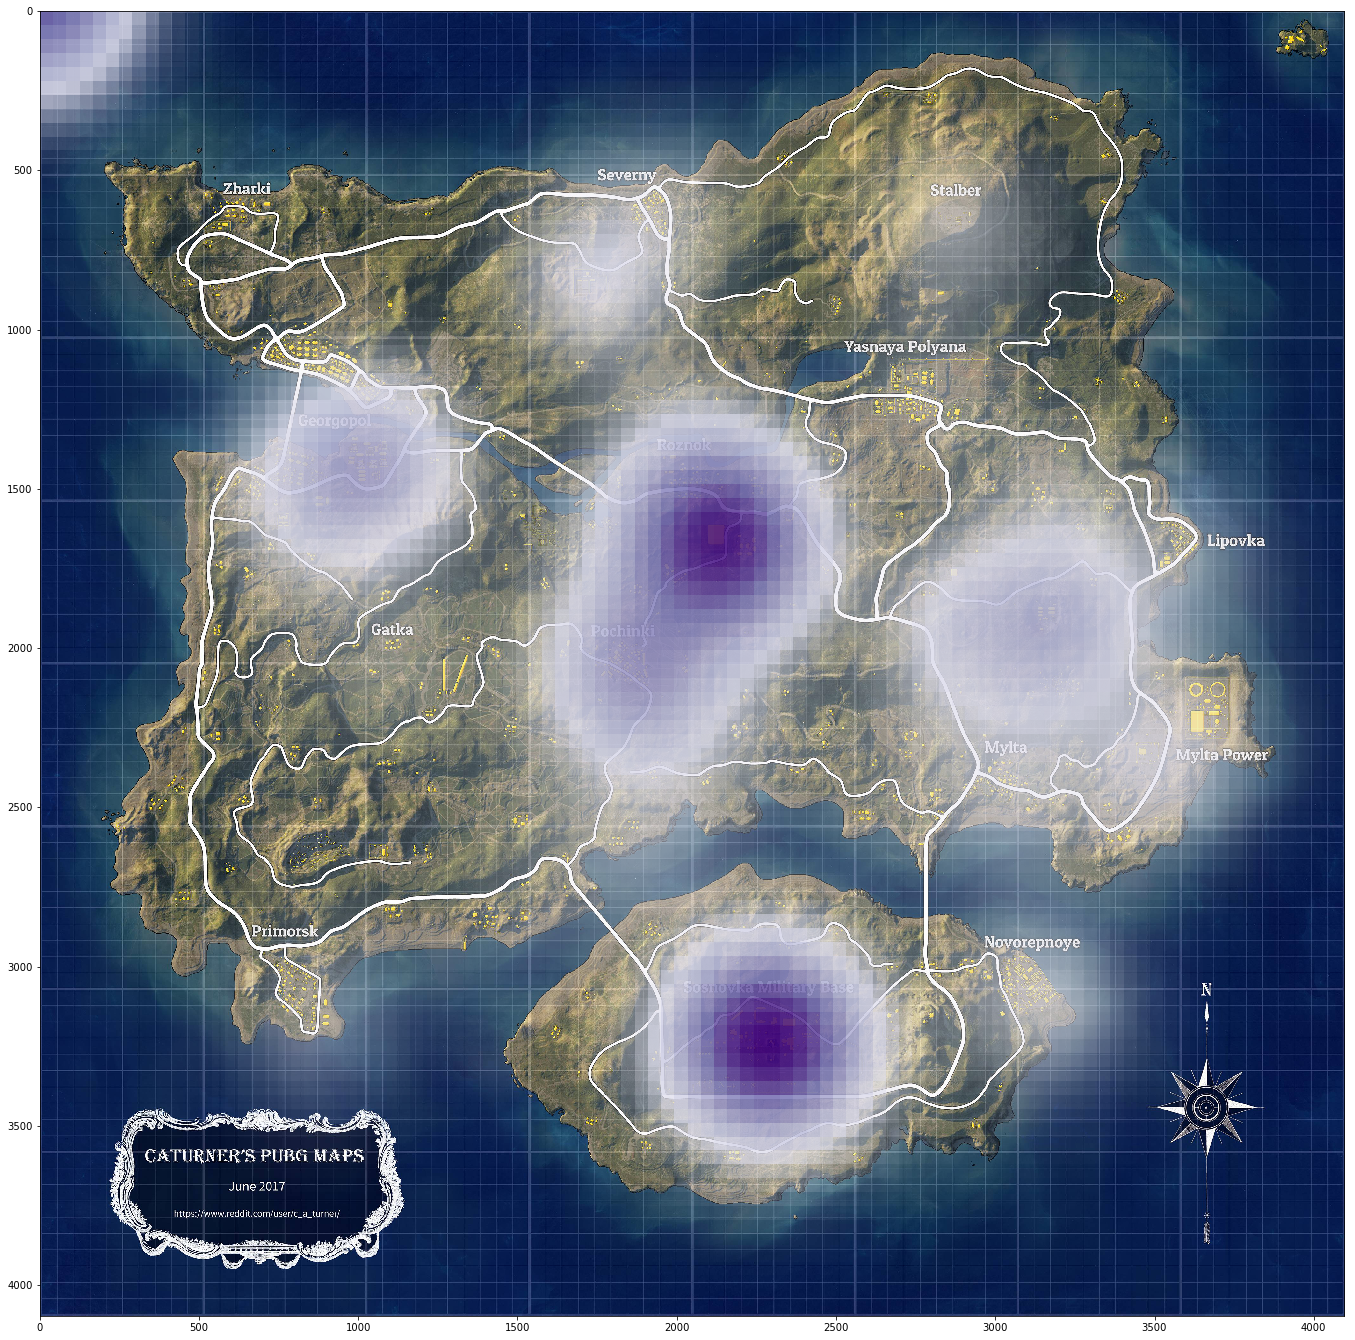

In [48]:
in_240_seconds= erangel.loc[erangel.time < 240]

pos = in_240_seconds[['victim_position_x', 'victim_position_y']].to_numpy()
pos = pos * scale

hmap, extent = heatmap(pos[:, 0], pos[:, 1], 4.5)
alphas = np.clip(Normalize(0, hmap.max(), clip=True)(hmap) * 4.5, 0.0, 1.)
colors = Normalize(0, hmap.max(), clip=True)(hmap)
colors = cm.Purples(colors)
colors[..., -1] = alphas
fig, ax = plt.subplots(figsize=(24, 24))
ax.set_xlim(0, 4096)
ax.set_ylim(0, 4096)
ax.imshow(bg)
ax.imshow(colors, extent=extent, origin='lower', cmap=cm.Reds, alpha=0.9)
plt.gca().invert_yaxis()
plt.savefig('out1.png', dpi=100)

## 1.2 End

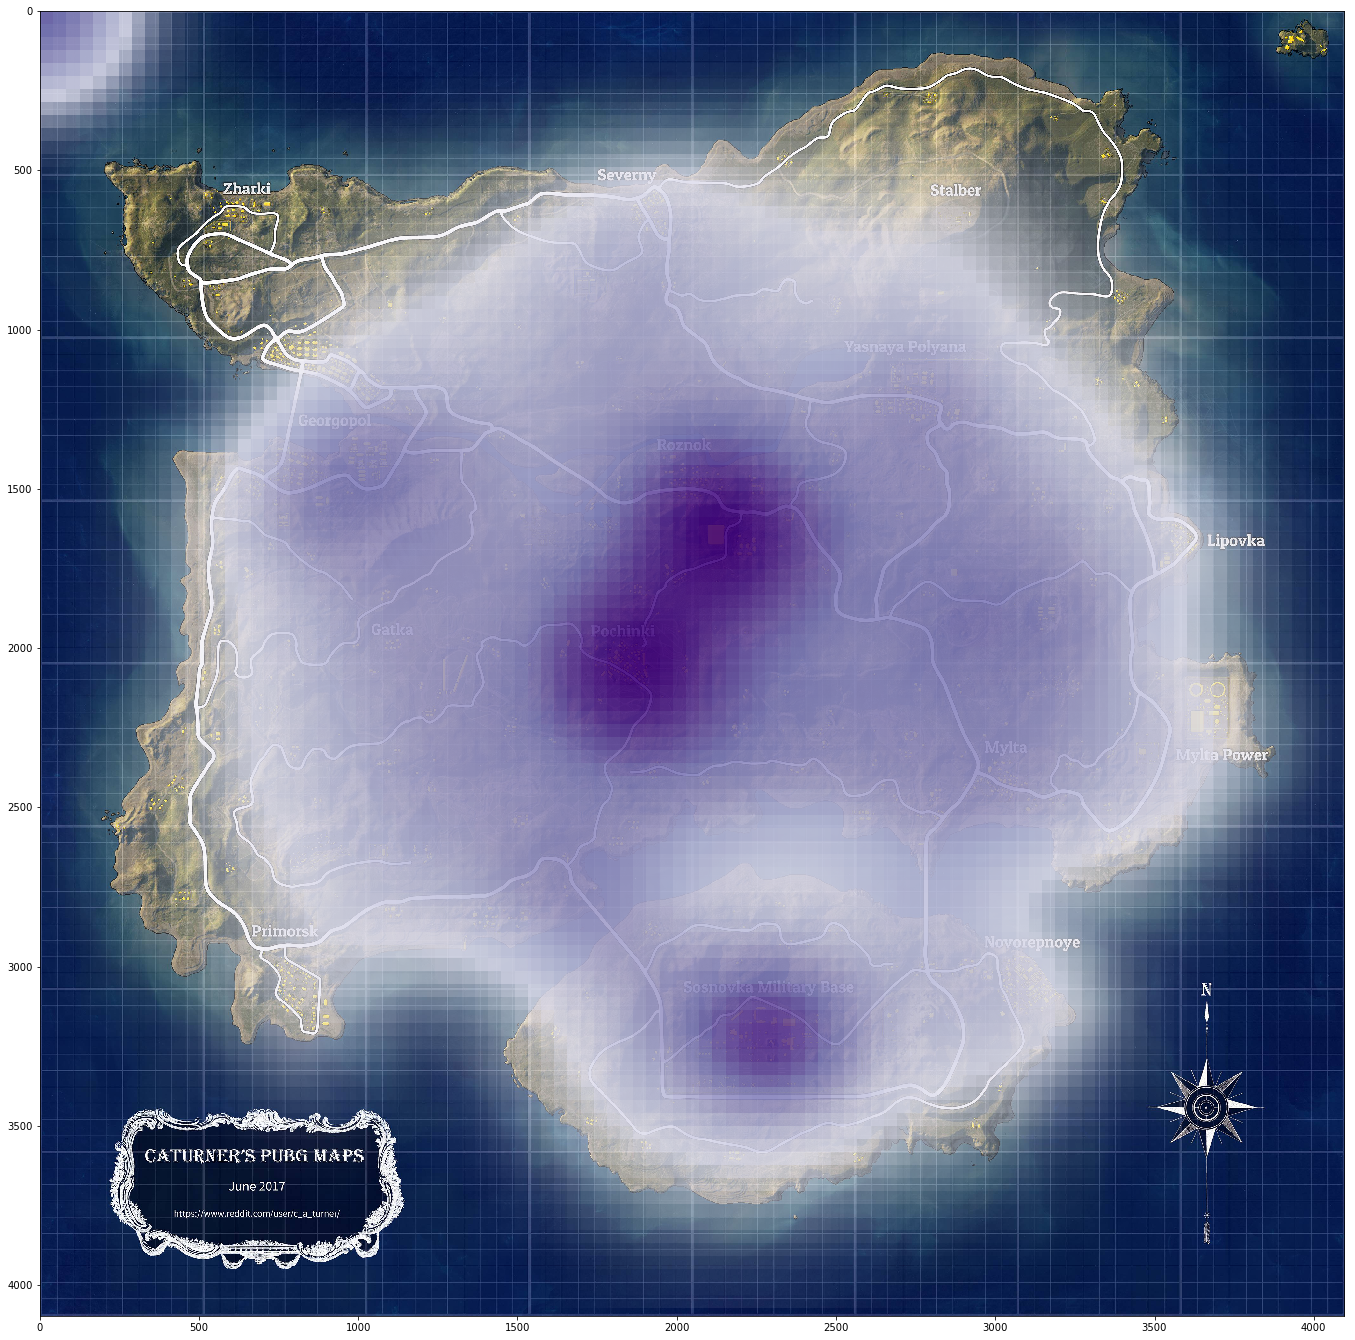

In [45]:
last_seconds= erangel.loc[erangel.killer_placement == 1]

pos = last_seconds[['victim_position_x', 'victim_position_y']].to_numpy()
pos = pos * scale

hmap, extent = heatmap(pos[:, 0], pos[:, 1], 4.5)
alphas = np.clip(Normalize(0, hmap.max(), clip=True)(hmap) * 4.5, 0.0, 1.)
colors = Normalize(0, hmap.max(), clip=True)(hmap)
colors = cm.Purples(colors)
colors[..., -1] = alphas
fig, ax = plt.subplots(figsize=(24, 24))
ax.set_xlim(0, 4096)
ax.set_ylim(0, 4096)
ax.imshow(bg)
ax.imshow(colors, extent=extent, origin='lower', cmap=cm.Reds, alpha=0.9)
plt.gca().invert_yaxis()
plt.savefig('out2.png', dpi=100)

# 2. ANGLE

In [7]:
erangel = death.loc[death.map == 'ERANGEL']

In [9]:
positions = erangel [['killer_position_x', 'killer_position_y', 'victim_position_x', 'victim_position_y']].dropna()
positions

killer_position_x  killer_position_y  victim_position_x  \
179                496989.8           312569.7           497385.4   
180                496989.8           312569.7           497819.4   
181                460416.7           414748.8           459817.9   
182                488034.1           347220.3           487444.2   
183                501062.9           425078.6           493043.4   
184                495501.2           429826.2           495755.7   
185                466173.1           642295.2           466214.9   
186                512029.6           450259.2           509867.3   
188                446553.8           621515.8           446698.3   
189                503140.7           433313.3           498006.2   
190                608792.0           479479.8           608422.8   
191                354734.6           397039.7           353669.1   
192                381840.7           424408.4           381840.7   
193                337859.9           160601.2           339345.6   
194                425943.7           425374.7           420891.6   
195                483222.9           345753.8           462537.2   
196                426267.9           425472.6           417302.6   
197                451052.9           629640.1           450792.1   
198                443493.3           625540.4           443663.6   
199                549587.6           594442.8           552512.1   
200                431516.6           636198.3           433497.2   
201                443659.8           623592.1           444418.6   
202                459874.5           415081.1           454229.3   
203                418100.5           384076.3           418285.2   
205                464406.3           640754.9           464351.3   
206                448660.3           446969.6           449527.3   
207                510092.7           437654.8           505057.9   
208                549784.7           455996.3           548009.1   
210                380997.1           424004.4           380997.1   
211                442933.5           439911.3           450018.6   
...                     ...                ...                ...   
11640824           421757.7           324493.6           421601.7   
11640825           401024.0           293403.0           401899.9   
11640826           302148.9           542450.3           318860.9   
11640827           336444.3           160859.2           335887.9   
11640828           336048.8           159830.6           336073.3   
11640829           384970.4           563433.1           402369.9   
11640830           320032.6           452049.0           318994.5   
11640831           321307.9           607429.4           316170.1   
11640832           363805.9           409411.3           363274.9   
11640833           553099.9           131760.5           553147.4   
11640834           335116.7           551806.4           330444.7   
11640835           332587.4           548129.4           331519.7   
11640836           368288.8           408681.4           367209.2   
11640837           307497.0           443310.1           317848.5   
11640838           383894.3           117235.1           382044.6   
11640839           299013.6           502318.8           300577.4   
11640840           315182.0           630935.4           299413.1   
11640842           298916.1           502220.2           300701.4   
11640843           368808.2           171333.2           368665.2   
11640844           319685.3           631087.0           318430.5   
11640845           301623.3           542448.6           298117.7   
11640846           365976.4           408712.3           366591.7   
11640847           433835.9           477778.9           427371.1   
11640848           315860.1           319491.2           315431.5   
11640849           516302.0           174832.3           516302.0   
11640850           398569.9           291699.7           398698.6   
11640851

In [10]:
positions ['delta_x'] = positions['victim_position_x'] - positions['killer_position_x']
positions ['delta_y'] = positions['victim_position_y'] - positions['killer_position_y']

In [46]:
positions['angle'] = np.degrees(np.arctan(positions['delta_y']/positions['delta_x']))
positions = positions.fillna(0)

In [48]:
ranges = [-90.1,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90]

In [51]:
angle_and_pro = positions.angle.groupby(pd.cut(positions.angle, ranges)).count()

In [61]:
angle_and_pro

angle
(-90.1, -80.0]    3011897
(-80.0, -70.0]    2662828
(-70.0, -60.0]    2510929
(-60.0, -50.0]    2465595
(-50.0, -40.0]    2465046
(-40.0, -30.0]    2476050
(-30.0, -20.0]    2445688
(-20.0, -10.0]    2544623
(-10.0, 0.0]      3671201
(0.0, 10.0]       3186599
(10.0, 20.0]      2923292
(20.0, 30.0]      2745969
(30.0, 40.0]      2831822
(40.0, 50.0]      2787695
(50.0, 60.0]      2736070
(60.0, 70.0]      2528069
(70.0, 80.0]      2550440
(80.0, 90.0]      2811076
Name: angle, dtype: int64

In [53]:
positions.count()

killer_position_x    49354889
killer_position_y    49354889
victim_position_x    49354889
victim_position_y    49354889
delta_x              49354889
delta_y              49354889
angle                49354889
dtype: int64

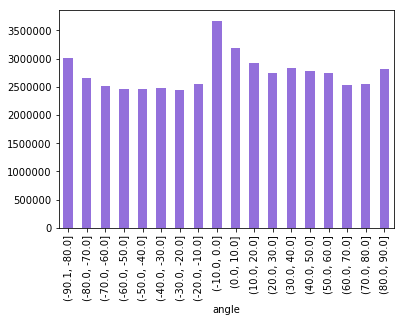

In [59]:
angle_and_pro.plot.bar(color = ['mediumpurple'])

plt.show()